In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
import numpy as np
from matplotlib_venn import venn2
import seaborn as sb

In [2]:
dir_fig = 'plots_trs/'

In [3]:
file_cov = '/expanse/projects/sebat1/s3/data/sebat/long_reads_pipeline_results/coverages_mod.tsv'
#file_cov = '/tscc/projects/ps-sebat1/s3/data/sebat/long_reads_pipeline_results/coverages_mod.tsv'
df_cov = pd.read_table(file_cov, header=0, sep='\t')
multiplat_samples = ['REACH000236', 'REACH000530', 'REACH000531', 'REACH000532', 'REACH000436']
df_cov['SAMPLE'] = df_cov.apply(lambda row: row['SAMPLE']+'_'+row['COHORT'] if row['SAMPLE'] in multiplat_samples else row['SAMPLE'], axis=1)
df_cov_high = df_cov.loc[df_cov.SAMPLE.str.startswith('REACH000') & (df_cov.MEAN_COVERAGE > 9)]
display(df_cov)
high_cov_samples = df_cov_high.SAMPLE.tolist()
#print(high_cov_samples)

def get_plat(sample):
    try:
        ret = df_cov[df_cov.SAMPLE == sample]['COHORT'].values[0]
    except:
        print(f'problem with samples: {sample}')
        ret = ''
    return ret

def get_cov(sample, plat):
    try:
        ret = df_cov[(df_cov.SAMPLE == sample) & (df_cov.COHORT == plat)]['MEAN_COVERAGE'].values[0]
    except:
        print(f'problem with samples: {sample}')
        ret = ''
    return ret

plat_dict = {sample: get_plat(sample) for sample in df_cov.SAMPLE.tolist()}

,SAMPLE,COHORT,MEAN_COVERAGE
0,HG004,ONT,81.44
1,REACH000626,ONT,10.51
2,REACH000546,ONT,10.87
3,REACH000683,ONT,9.97
4,REACH000563,ONT,8.68
...,...,...,...
283,REACH000284,PB,3.43
284,REACH000672,PB,5.02
285,REACH000292,PB,9.00
286,REACH000066,PB,1.61


In [6]:
file_psam = '/expanse/projects/sebat1/miladm/UCSD/LONG_READ_COHORT/process_IL_LR/HWE/REACH_LR_platform.psam'
df_p = pd.read_table(file_psam, sep='\t', header=None, names = ['famid', 'sample_id', 'dad', 'mom', 'sex', 'phen'])
display(df_p)

print('complete trios:')
df_trios = df_p.loc[df_p.dad.isin(df_p.sample_id) & df_p.mom.isin(df_p.sample_id)]
display(df_trios)
print(df_trios.sex.value_counts())
print(df_trios.phen.value_counts())

# make mom and dad dictionary
sample_dad_dict = {}
sample_mom_dict = {}
for sample, dad, mom in zip(df_trios.sample_id, df_trios.dad, df_trios.mom):
    #print(sample, dad, mom)
    sample_dad_dict[sample] = dad
    sample_mom_dict[sample] = mom

parents_set_lr = set(df_trios.dad.tolist()) | set(df_trios.mom.tolist())
#print(f'len(parents_set_lr): {len(parents_set_lr)}')
#print(parents_set_lr)

parents_set_pb = set([x for x in parents_set_lr if plat_dict[x]=='PB'])
parents_set_ont = set([x for x in parents_set_lr if plat_dict[x]=='ONT'])
#print('len(parents_set_pb):', len(parents_set_pb))
#print('len(parents_set_ont):', len(parents_set_ont))

parent_kids_dict = {}
mom_kids_dict = {}
dad_kids_dict = {}
for parent in parents_set_lr:
    parent_kids_dict[parent] = df_trios.loc[(df_trios.dad == parent) | (df_trios.mom == parent)].sample_id.tolist()
    if parent in df_trios.dad.tolist():
        dad_kids_dict[parent] = df_trios.loc[(df_trios.dad == parent)].sample_id.tolist()
    if parent in df_trios.mom.tolist():
        mom_kids_dict[parent] = df_trios.loc[(df_trios.mom == parent)].sample_id.tolist()
print(f'len(parent_kids_dict): {len(parent_kids_dict)}')
#print(parent_kids_dict)
print(f'len(mom_kids_dict): {len(mom_kids_dict)}')
#print(mom_kids_dict)
print(f'len(dad_kids_dict): {len(dad_kids_dict)}')
#print(dad_kids_dict)

mate_dict = {}
for dad, mom in zip(df_trios.dad, df_trios.mom):
    mate_dict[dad] = mom
    mate_dict[mom] = dad
print(f'len(mate_dict): {len(mate_dict)}')
#print(mate_dict)

,famid,sample_id,dad,mom,sex,phen
0,2323,2323-2-1,0,0,2,2
1,2602,2602-2-1,0,0,2,2
2,3392,3392-2-3,0,0,2,2
3,3538,3538-2-1,0,0,2,2
4,3939,3939-3-1,0,0,2,2
...,...,...,...,...,...,...
275,F0270,REACH000681,REACH000683,REACH000682,1,2
276,F0270,REACH000682,0,0,2,2
277,F0270,REACH000683,0,0,1,2
278,F0270,REACH000684,REACH000683,REACH000682,1,2


complete trios:


,famid,sample_id,dad,mom,sex,phen
10,F0026,REACH000026,REACH000270,REACH000269,1,2
11,F0058,REACH000058,REACH000440,REACH000439,1,2
12,F0065,REACH000065,REACH000067,REACH000066,1,2
15,F0078,REACH000086,REACH000088,REACH000087,1,2
18,F0078,REACH000089,REACH000088,REACH000087,2,2
...,...,...,...,...,...,...
271,F0266,REACH000660,REACH000662,REACH000661,2,2
274,F0266,REACH000663,REACH000662,REACH000661,1,1
275,F0270,REACH000681,REACH000683,REACH000682,1,2
278,F0270,REACH000684,REACH000683,REACH000682,1,2


sex
1    74
2    43
Name: count, dtype: int64
phen
2    92
1    25
Name: count, dtype: int64
len(parent_kids_dict): 126
len(mom_kids_dict): 63
len(dad_kids_dict): 63
len(mate_dict): 126


In [7]:
meta_file = '/expanse/projects/sebat1/miladm/UCSD/LONG_READ_COHORT/REACH_sample_info.tsv'
df_meta = pd.read_table(meta_file, sep='\t', header=0)

rename_samples_dict = {'REACH000236': 'REACH000236_PB', 
                       'REACH000436': 'REACH000436_PB', 
                       'REACH000530': 'REACH000530_PB', 
                       'REACH000531': 'REACH000531_ONT', 
                       'REACH000532': 'REACH000532_ONT'}
df_meta['Sample_ID'] = df_meta.apply(lambda row: rename_samples_dict[row['Sample_ID']] 
                                     if row['Sample_ID'] in rename_samples_dict else row['Sample_ID'], axis=1)
display(df_meta)

aff_dict = {}
for sample, aff in zip(df_meta['Sample_ID'].tolist(), df_meta['Affected'].tolist()):
    aff_dict[sample] = aff 

,Sample_ID,Subject_ID,Family_ID,DOB,Family_Type,Affected,Diagnosis_LAB,Mother_ID,Father_ID,Rel_Proband,...,Date sent for DNA extraction,Location of DNA extraction,DNA Box,Concentration (ng/uL),260/280,Date sent for Sequencing,WGS Provider,(Sample Well) Plate Name.Sample.ID,Affected_orig,Affected_ASD
0,REACH000001,F0001-01,F0001,3/26/2007,trio,Yes,Autism,F0001-02,F0001-03,Proband,...,Unknown,Gleeson,1,60.0,1.80,9/9/2013,Illumina,LP6005688-DNA_E11,Yes,Yes
1,REACH000107,F0001-02,F0001,8/9/1972,trio,Yes,Autism,Unknown,Unknown,Mom,...,Unknown,Gleeson,2,60.0,NaN,9/9/2013,Illumina,LP6005688-DNA_F11,Yes,Yes
2,REACH000226,F0001-03,F0001,9/27/1969,trio,Yes,"Autism, PTSD, ADHD",Unknown,Unknown,Dad,...,Unknown,Gleeson,3,60.0,NaN,9/9/2013,Illumina,LP6005688-DNA_G11,Yes,Yes
3,REACH000002,F0002-01,F0002,11/19/2007,incomplete,Yes,Autism,Unknown,Unknown,Proband,...,Unknown,Gleeson,1,Incomplete,Incomplete,Incomplete family,Incomplete family,Incomplete family,Yes,Yes
4,REACH000003,F0003-01,F0003,8/9/2000,incomplete,Yes,Autism,Unknown,Unknown,Proband,...,Unknown,Gleeson,1,Incomplete,Incomplete,Incomplete family,Incomplete family,Incomplete family,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,REACH000889,F0320-02,F0320,1/15/1981,multiple,No,"Crohn's Disease, Lupus (SLE)",F8888-88,F8888-88,Mom,...,2/28/2017,Sebat,11,36.2,1.79,pending,pending,pending,No,No
889,REACH000890,F0320-03,F0320,7/9/1980,multiple,No,NaN,F8888-88,F8888-88,Dad,...,2/28/2017,Sebat,11,41.9,1.84,pending,pending,pending,No,No
890,REACH000891,F0320-04,F0320,2/26/2010,multiple,No,NaN,F0320-02,F0320-03,Sibling,...,2/28/2017,Sebat,11,119.7,1.84,pending,pending,pending,No,No
891,REACH000892,F0320-05,F0320,10/14/2011,multiple,No,NaN,F0320-02,F0320-03,Sibling,...,2/28/2017,Sebat,12,134.1,1.85,pending,pending,pending,No,No


In [8]:
#file_pca = '/expanse/projects/sebat1/miladm/UCSD/LONG_READ_COHORT/PCA/kid_pca_info.csv'
#file_pca = '/expanse/projects/sebat1/miladm/UCSD/LONG_READ_COHORT/PCA/SummaryGeneticData_REACH_SSC_SPARK.SBayesR.20210915.csv'
file_pca = '/expanse/projects/sebat1/j3guevar/SFARI/aspera-sf/SFARI_DS468588/data/master_phen_4.SBayesR.20210915.csv'

df_pca = pd.read_table(file_pca, sep=',', header=0)
cols = ['fid', 'iid', 'phen','sex','cohort','duo','family','is_eur','PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10', 
        'PC1_PAT','PC2_PAT','PC3_PAT','PC4_PAT','PC5_PAT','PC6_PAT','PC7_PAT','PC8_PAT','PC9_PAT','PC10_PAT', 
        'PC1_MAT','PC2_MAT','PC3_MAT','PC4_MAT','PC5_MAT','PC6_MAT','PC7_MAT','PC8_MAT','PC9_MAT','PC10_MAT']
df_pca = df_pca[cols]

rename_samples_dict = {'REACH000236': 'REACH000236_PB', 
                       'REACH000436': 'REACH000436_PB', 
                       'REACH000530': 'REACH000530_PB', 
                       'REACH000531': 'REACH000531_ONT', 
                       'REACH000532': 'REACH000532_ONT'}
df_pca['iid'] = df_pca.apply(lambda row: rename_samples_dict[row['iid']] if row['iid'] in rename_samples_dict else row['iid'], axis=1)
#display(df_pca)

# first filter for the kids, then add parents to them
df_pca_flt = df_pca.loc[df_pca.iid.isin(df_trios.sample_id)].copy()
df_pca_flt['rel'] = 'C'
print('df_pca_flt:')
display(df_pca_flt)

df_parents = pd.DataFrame()
for index, row in df_pca_flt.iterrows():
    sample = row['iid']
    fid = row['fid']
    phen = row['phen']
    is_eur = row['is_eur']
    pc_mat = [row[f'PC{x}_MAT'] for x in range(1,11)]
    pc_pat = [row[f'PC{x}_PAT'] for x in range(1,11)]
    dad = sample_dad_dict[sample]
    mom = sample_mom_dict[sample]
    
    dict_mat = {'fid': [fid], 'iid': [mom], 'phen': ['.'], 'sex': ['Female'], 'cohort': [1], 'duo': ['.'], 'is_eur': [is_eur]}
    dict_mat.update({f'PC{x}': [pc_mat[x-1]] for x in range(1,11)})
    df_mat = pd.DataFrame(dict_mat)

    dict_pat = {'fid': [fid], 'iid': [dad], 'phen': ['.'], 'sex': ['Male'], 'cohort': [1], 'duo': ['.'], 'is_eur': [is_eur]}
    dict_pat.update({f'PC{x}': [pc_pat[x-1]] for x in range(1,11)})
    df_pat = pd.DataFrame(dict_pat)
    
    if df_parents.shape[0] == 0 or mom not in df_parents.iid.tolist():
        df_parents = pd.concat([df_parents, df_mat])
    if df_parents.shape[0] == 0 or dad not in df_parents.iid.tolist():
        df_parents = pd.concat([df_parents, df_pat])

df_parents['rel'] = 'P'
print('df_parents:')
display(df_parents)

df_pca_flt = pd.concat([df_pca_flt, df_parents])
print('df_pca_flt:')
display(df_pca_flt)

df_pca_flt = pd.merge(df_pca_flt, df_meta[['Sample_ID', 'Affected', 'Affected_ASD']], how='inner', left_on='iid', right_on='Sample_ID')
df_pca_flt = pd.merge(df_pca_flt, df_cov[['SAMPLE', 'MEAN_COVERAGE']], how='inner', left_on='iid', right_on='SAMPLE')

df_pca_flt['Phenotype'] = df_pca_flt.apply(lambda row: 1 if row.Affected == 'Yes' else 0, axis=1)
df_pca_flt['Phenotype_ASD'] = df_pca_flt.apply(lambda row: 1 if row.Affected_ASD == 'Yes' else 0, axis=1)
df_pca_flt['Platform'] = df_pca_flt.apply(lambda row: get_plat(row.iid), axis=1)
#df_pca_flt.to_csv('investigate2.tsv', sep='\t', index=None)

df_pca_flt:


,fid,iid,phen,sex,cohort,duo,family,is_eur,PC1,PC2,...,PC2_MAT,PC3_MAT,PC4_MAT,PC5_MAT,PC6_MAT,PC7_MAT,PC8_MAT,PC9_MAT,PC10_MAT,rel
136,F0001,REACH000001,ASD,Male,1,trio,1,1,0.008627,-0.005607,...,0.000410,0.002845,-0.019312,-0.013769,-0.014384,0.007249,0.002096,0.005399,-0.014983,C
137,F0026,REACH000026,ASD,Male,1,trio,1,0,0.095364,-0.045230,...,-0.047780,-0.017435,0.153686,0.005292,-0.009487,-0.020773,0.034190,0.015895,-0.011925,C
139,F0058,REACH000058,ASD,Male,1,trio,1,1,0.002422,-0.009216,...,-0.003289,0.003757,-0.004828,0.007650,0.005633,0.032103,0.009510,0.020007,0.016383,C
140,F0065,REACH000065,ASD,Male,1,trio,1,0,0.252774,0.107933,...,0.049799,0.158347,0.011411,0.004728,0.007690,-0.006605,0.008261,-0.012000,-0.009906,C
146,F0078,REACH000086,ASD,Male,1,trio,2,0,0.044785,0.038065,...,0.080387,0.132056,0.029583,0.020156,0.007971,-0.002383,0.014468,0.006253,-0.018303,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,F0290,REACH000762,ASD,Male,1,trio,1,1,-0.027901,0.000946,...,0.003052,-0.009075,-0.014136,-0.005499,-0.008555,0.015644,0.004869,0.011004,-0.019684,C
409,F0290,REACH000765,CON,Female,1,trio,1,1,-0.030809,-0.001867,...,0.003052,-0.009075,-0.014136,-0.005499,-0.008555,0.015644,0.004869,0.011004,-0.019684,C
410,F0290,REACH000766,CON,Female,1,trio,1,1,-0.028469,-0.005167,...,0.003052,-0.009075,-0.014136,-0.005499,-0.008555,0.015644,0.004869,0.011004,-0.019684,C
411,F0291,REACH000767,ASD,Male,1,trio,1,0,0.087690,-0.012273,...,-0.016917,-0.021358,0.151522,-0.035297,0.008383,0.005679,0.020179,-0.022316,0.002755,C


df_parents:


,fid,iid,phen,sex,cohort,duo,is_eur,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,rel
0,F0001,REACH000107,.,Female,1,.,1,-0.022403,0.000410,0.002845,-0.019312,-0.013769,-0.014384,0.007249,0.002096,0.005399,-0.014983,P
0,F0001,REACH000226,.,Male,1,.,1,0.024023,-0.013482,-0.003936,0.129597,0.030587,-0.007727,-0.002212,-0.022159,0.005150,-0.000824,P
0,F0026,REACH000269,.,Female,1,.,0,0.100551,-0.047780,-0.017435,0.153686,0.005292,-0.009487,-0.020773,0.034190,0.015895,-0.011925,P
0,F0026,REACH000270,.,Male,1,.,0,0.091671,-0.037847,-0.022134,0.163193,0.007864,-0.006841,-0.023716,0.040800,0.006666,-0.012916,P
0,F0058,REACH000439,.,Female,1,.,1,-0.025327,-0.003289,0.003757,-0.004828,0.007650,0.005633,0.032103,0.009510,0.020007,0.016383,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,F0288,REACH000756,.,Male,1,.,0,0.204041,0.127559,0.190286,0.013553,0.006706,-0.001266,-0.010150,0.006605,-0.006867,0.006560,P
0,F0290,REACH000763,.,Female,1,.,1,-0.030630,0.003052,-0.009075,-0.014136,-0.005499,-0.008555,0.015644,0.004869,0.011004,-0.019684,P
0,F0290,REACH000764,.,Male,1,.,1,-0.027327,-0.004878,-0.003881,0.000495,0.003727,-0.001647,-0.008831,0.016730,-0.005315,0.006958,P
0,F0291,REACH000768,.,Female,1,.,0,0.091442,-0.016917,-0.021358,0.151522,-0.035297,0.008383,0.005679,0.020179,-0.022316,0.002755,P


df_pca_flt:


,fid,iid,phen,sex,cohort,duo,family,is_eur,PC1,PC2,...,PC2_MAT,PC3_MAT,PC4_MAT,PC5_MAT,PC6_MAT,PC7_MAT,PC8_MAT,PC9_MAT,PC10_MAT,rel
136,F0001,REACH000001,ASD,Male,1,trio,1.0,1,0.008627,-0.005607,...,0.000410,0.002845,-0.019312,-0.013769,-0.014384,0.007249,0.002096,0.005399,-0.014983,C
137,F0026,REACH000026,ASD,Male,1,trio,1.0,0,0.095364,-0.045230,...,-0.047780,-0.017435,0.153686,0.005292,-0.009487,-0.020773,0.034190,0.015895,-0.011925,C
139,F0058,REACH000058,ASD,Male,1,trio,1.0,1,0.002422,-0.009216,...,-0.003289,0.003757,-0.004828,0.007650,0.005633,0.032103,0.009510,0.020007,0.016383,C
140,F0065,REACH000065,ASD,Male,1,trio,1.0,0,0.252774,0.107933,...,0.049799,0.158347,0.011411,0.004728,0.007690,-0.006605,0.008261,-0.012000,-0.009906,C
146,F0078,REACH000086,ASD,Male,1,trio,2.0,0,0.044785,0.038065,...,0.080387,0.132056,0.029583,0.020156,0.007971,-0.002383,0.014468,0.006253,-0.018303,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,F0288,REACH000756,.,Male,1,.,NaN,0,0.204041,0.127559,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P
0,F0290,REACH000763,.,Female,1,.,NaN,1,-0.030630,0.003052,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P
0,F0290,REACH000764,.,Male,1,.,NaN,1,-0.027327,-0.004878,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P
0,F0291,REACH000768,.,Female,1,.,NaN,0,0.091442,-0.016917,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P


In [4]:
file_name = 'test.tsv'
df = pd.read_table(file_name, sep='\t', header=0, keep_default_na=False)

/scratch/smmortazavi/job_34160284/ipykernel_3343706/2698159180.py:2: DtypeWarning: Columns (24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_table(file_name, sep='\t', header=0, keep_default_na=False)


plots_trs/hist_samples_genotyped.png


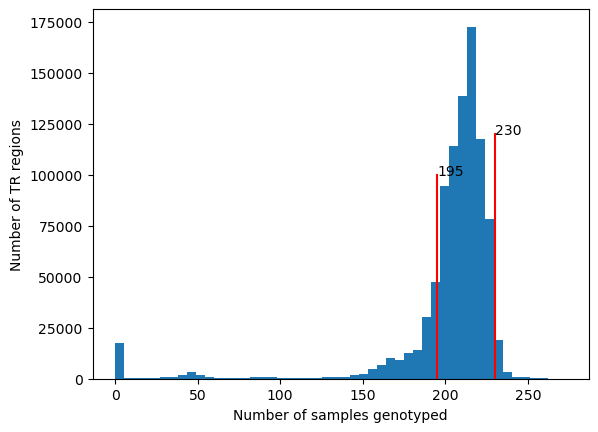

In [9]:
# plot histogram of the number of samples genotyped
plt.figure()
plt.hist(df.SN_GB, bins=50)
x_lim = 195
y_lim = 100000
plt.plot([x_lim, x_lim], [0, y_lim], '-r')
plt.text(x_lim, y_lim, f'{x_lim}')

x_lim = 230
y_lim = 120000
plt.plot([x_lim, x_lim], [0, y_lim], '-r')
plt.text(x_lim, y_lim, f'{x_lim}')

#plt.plot([60, 60], [0, 75000], '--r')
#plt.text(60, 75000, '60')
plt.xlabel('Number of samples genotyped')
plt.ylabel('Number of TR regions')
fig_name = dir_fig+'hist_samples_genotyped.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight')
plt.show()
plt.close()



plots_trs/hist_middle_peak_chroms.png


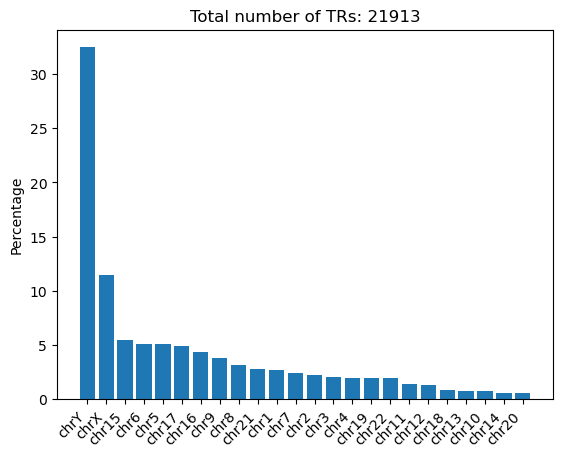

plots_trs/hist_left_peak_chrom_loc.png


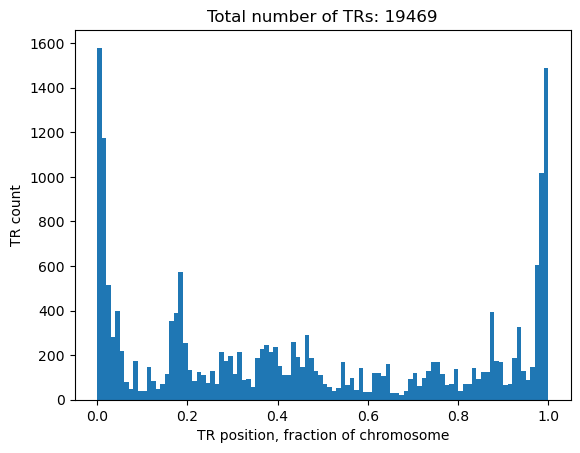

In [10]:
file_chr_size = '/expanse/projects/sebat1/miladm/UCSD/reference_genomes/hg38.chrom.sizes'
df_chr_size = pd.read_table(file_chr_size, sep='\t', header=None, names=['chrom', 'size'], index_col=0)
#display(df_chr_size)

# characterizing the other middle peak
#df_flt = df.loc[(df.SN_GB >=100)&(df.SN_GB <=150)].copy()
df_flt = df.loc[(df.SN_GB >=25)&(df.SN_GB <=150)].copy()
#display(df_flt)
N_tot = df_flt.shape[0]
counts = df_flt.CHROM.value_counts()
counts_pct = counts / N_tot * 100
#display(counts_pct)
plt.figure()
plt.bar(x=counts_pct.index.tolist(), height=counts_pct)
#plt.xlabel('TR position, fraction of chromosome')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Percentage')
plt.title(f'Total number of TRs: {df_flt.shape[0]}')
fig_name = dir_fig+'hist_middle_peak_chroms.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight')
plt.show()
plt.close()

# characterizing the other zero peak
df_flt = df.loc[(df.SN_GB <=25)].copy()
df_flt['chrom_size'] = df_flt['CHROM'].map(df_chr_size['size'])
df_flt['pos_pct'] = df_flt.POS / df_flt['chrom_size']
#display(df_flt)

plt.figure()
plt.hist(df_flt.pos_pct, bins=100)
plt.xlabel('TR position, fraction of chromosome')
plt.ylabel('TR count')
plt.title(f'Total number of TRs: {df_flt.shape[0]}')
fig_name = dir_fig+'hist_left_peak_chrom_loc.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight')
plt.show()
plt.close()


plots_trs/hist_zscore.png


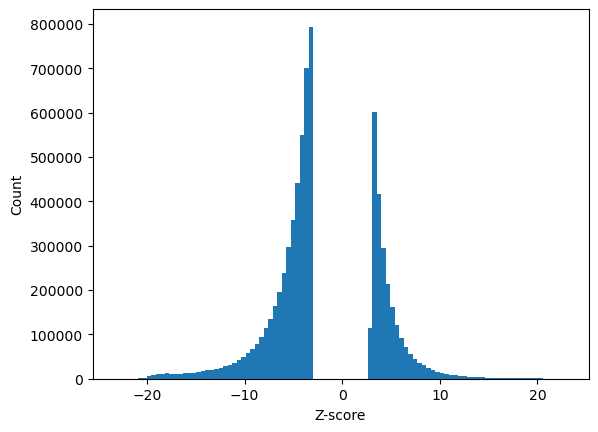

plots_trs/hist_bp_dev_lzs9.png


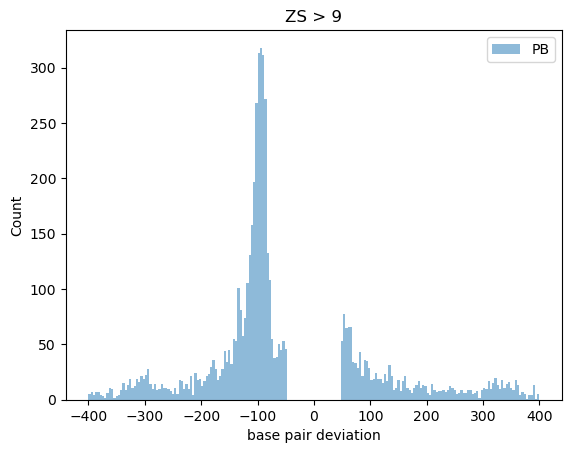

plots_trs/hist_bp_dev_lzs7.png


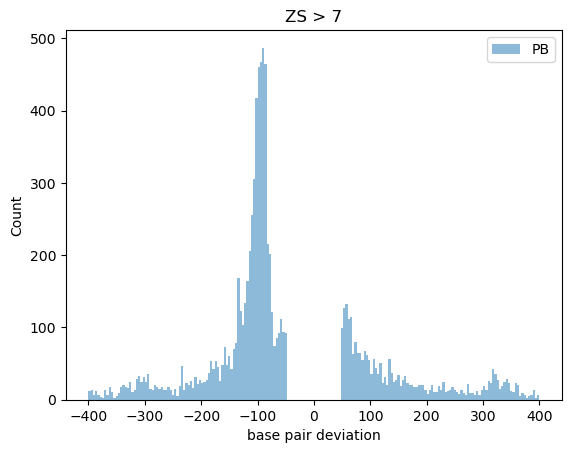

plots_trs/hist_bp_dev_lzs5.png


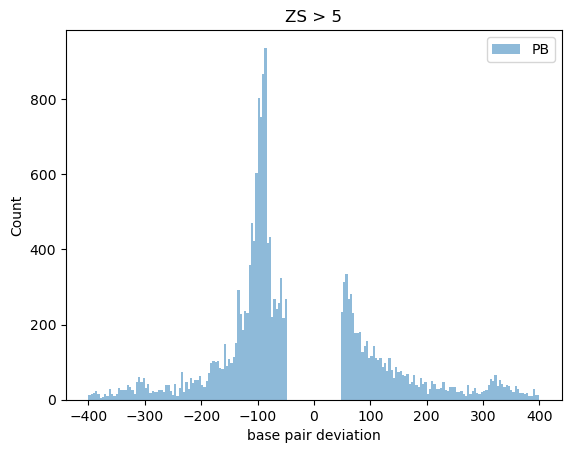

plots_trs/hist_bp_dev_lzs3.png


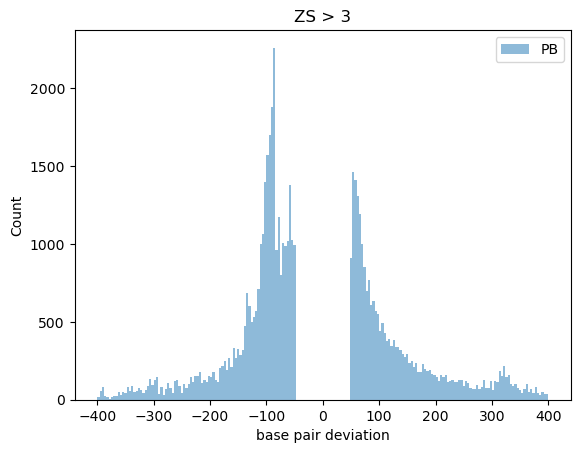

plots_trs/hist_bp_dev_lzs3_chroms.png


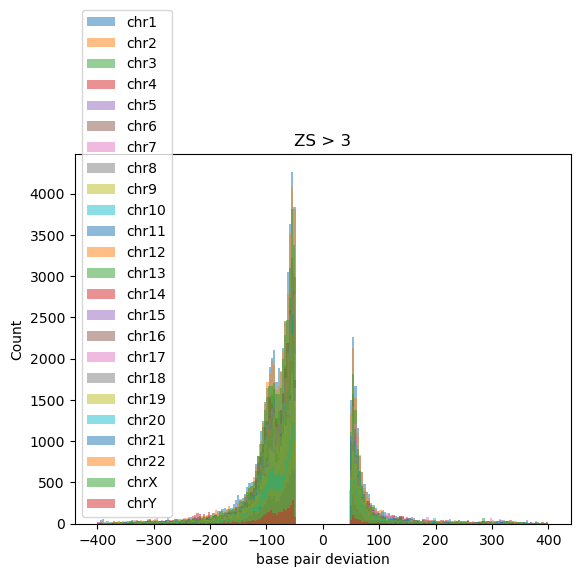

In [5]:
file_name = 'output/zs_large_3.txt'
df_zs = pd.read_table(file_name, sep='\t', names=['ID', 'Z-score', 'GB', 'SAMPLE'])
df_zs['chrom'] = df_zs['ID'].map(lambda x: x.split('_')[0])
df_zs['platform'] = df_zs['SAMPLE'].map(plat_dict)
#display(df_zs)
plt.figure()
bins = 100
plt.hist(df_zs['Z-score'], bins=bins)
plt.xlabel('Z-score')
plt.ylabel('Count')
fig_name = dir_fig+'hist_zscore.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight')
plt.show()
plt.close()

chroms = [f'chr{i}' for i in range(1,23)] + ['chrX', 'chrY']

#for z_thr in [12, 11, 10, 9, 7, 5, 3]:
for z_thr in [9, 7, 5, 3]:
    plt.figure()
    bp_thr_hight = 400
    bp_thr_low = 50
    bins = 200
    ###plt.hist(df_zs.loc[(df_zs['Z-score'].abs()>z_thr) & (df_zs.GB.abs()<=bp_thr_hight) & (df_zs.GB.abs()>=bp_thr_low)]['GB'], bins=bins, label='all chroms', alpha=.5)
    #plt.hist(df_zs.loc[(df_zs.chrom=='chr1') & (df_zs['Z-score'].abs()>z_thr) & (df_zs.GB.abs()<=bp_thr_hight) & (df_zs.GB.abs()>=bp_thr_low)]['GB'], bins=bins, label='chr1', alpha=.5)
    #plt.hist(df_zs.loc[(df_zs.chrom=='chrX') & (df_zs['Z-score'].abs()>z_thr) & (df_zs.GB.abs()<=bp_thr_hight) & (df_zs.GB.abs()>=bp_thr_low)]['GB'], bins=bins, label='chrX', alpha=.5)
    ###plt.hist(df_zs.loc[(df_zs.platform=='ONT') & (df_zs['Z-score'].abs()>z_thr) & (df_zs.GB.abs()<=bp_thr_hight) & (df_zs.GB.abs()>=bp_thr_low)]['GB'], bins=bins, label='ONT', alpha=.5)
    plt.hist(df_zs.loc[(df_zs.platform=='PB') & (df_zs['Z-score'].abs()>z_thr) & (df_zs.GB.abs()<=bp_thr_hight) & (df_zs.GB.abs()>=bp_thr_low)]['GB'], bins=bins, label='PB', alpha=.5)
    plt.xlabel('base pair deviation')
    plt.ylabel('Count')
    plt.title(f'ZS > {z_thr}')
    plt.legend()
    fig_name = dir_fig+f'hist_bp_dev_lzs{z_thr}.png'
    print(fig_name)
    plt.savefig(fig_name, bbox_inches='tight')
    plt.show()
    plt.close()

z_thr = 3
plt.figure()
bp_thr = 400
bins = 200
for chrom in chroms:
    plt.hist(df_zs.loc[(df_zs.chrom==chrom) & (df_zs['Z-score'].abs()>z_thr) & (df_zs.GB.abs()<=bp_thr_hight) & (df_zs.GB.abs()>=bp_thr_low)]['GB'], bins=bins, label=chrom, alpha=.5)
    
plt.xlabel('base pair deviation')
plt.ylabel('Count')
plt.title(f'ZS > {z_thr}')
plt.legend()
fig_name = dir_fig+f'hist_bp_dev_lzs{z_thr}_chroms.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight')
plt.show()
plt.close()

,sample,Num_TRs,SAMPLE,COHORT,MEAN_COVERAGE,cov,missingness,Affected,case_status
2,REACH000729,0,REACH000729,PB,0.00,0.00,1.000000,No,control
10,REACH000728,133,REACH000728,PB,0.00,0.00,0.999855,No,control
13,REACH000229,371,REACH000229,PB,0.29,0.29,0.999596,Yes,case
14,REACH000232,375,REACH000232,PB,0.30,0.30,0.999592,No,control
15,REACH000231,388,REACH000231,PB,0.40,0.40,0.999578,No,control
...,...,...,...,...,...,...,...,...,...
273,REACH000423,896825,REACH000423,ONT,9.29,9.29,0.023659,Yes,case
274,REACH000226,896916,REACH000226,ONT,29.45,29.45,0.023560,Yes,case
275,REACH000425,897039,REACH000425,ONT,10.82,10.82,0.023426,No,control
276,REACH000428,898153,REACH000428,ONT,19.66,19.66,0.022213,Yes,case


plots_trs/ntrs_vs_cov.png


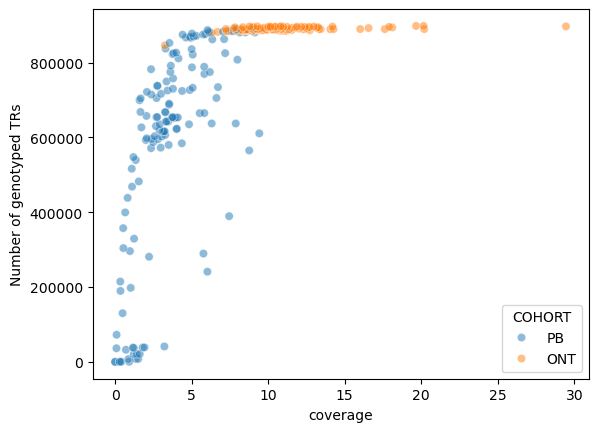

plots_trs/missingness_vs_cov.png


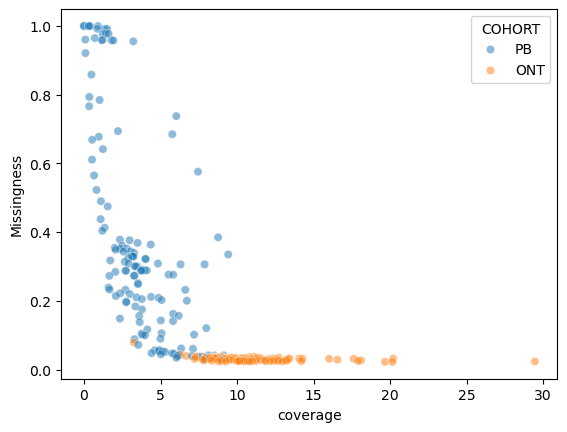

plots_trs/missingness_platforms.png


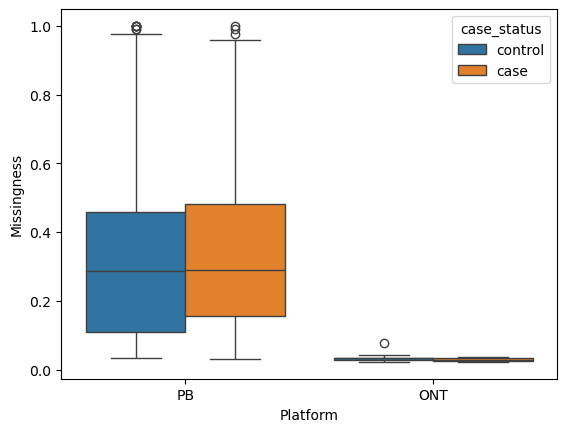

plots_trs/coverage_platforms.png


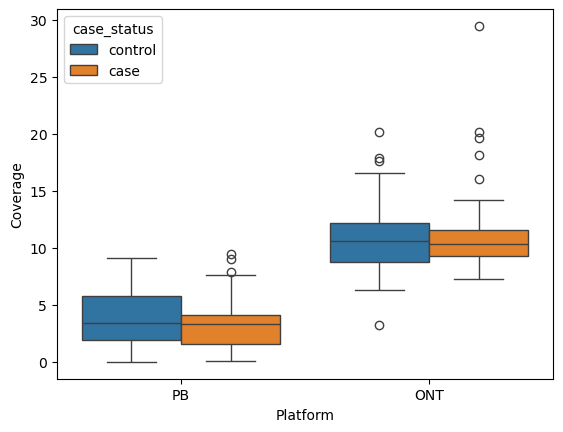

In [25]:
N_TR_TOT = 918557
file_ntrs = '/expanse/projects/sebat1/miladm/UCSD/LONG_READ_COHORT/TRs_LongTR/FAM/variant_prior/NTR_COV/gt_counts.tsv'
df_ntrs = pd.read_table(file_ntrs, sep='\t', names=['sample', 'Num_TRs'])
#display(df_ntrs)

df_merge = df_ntrs.merge(df_cov, how='left', left_on='sample', right_on='SAMPLE')
#display(df_merge)

df_merge_flt = df_merge.loc[df_merge['sample'].isin(df_pca_flt.iid)].copy()
df_merge_flt.Num_TRs = pd.to_numeric(df_merge_flt.Num_TRs)
df_merge_flt['cov'] = pd.to_numeric(df_merge_flt['MEAN_COVERAGE'])
df_merge_flt['missingness'] = 1. - df_merge_flt.Num_TRs / N_TR_TOT
df_merge_flt['Affected'] = df_merge_flt.SAMPLE.map(aff_dict)
df_merge_flt['case_status'] = df_merge_flt.Affected.map({'Yes': 'case', 'No': 'control'})
display(df_merge_flt)

### Number of genotyped TRs vs coverage
plt.figure()
sb.scatterplot(data=df_merge_flt, x='cov', y='Num_TRs', hue='COHORT', alpha=.5)
plt.xlabel('coverage')
plt.ylabel('Number of genotyped TRs')
fig_name = dir_fig+'ntrs_vs_cov.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight')
plt.show()
plt.close()

### missingness vs coverage
plt.figure()
sb.scatterplot(data=df_merge_flt, x='cov', y='missingness', hue='COHORT', alpha=.5)
plt.xlabel('coverage')
plt.ylabel('Missingness')
fig_name = dir_fig+'missingness_vs_cov.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight')
plt.show()
plt.close()

### missingness box plot
plt.figure()
sb.boxplot(data=df_merge_flt, x='COHORT', y='missingness', hue='case_status')
plt.xlabel('Platform')
plt.ylabel('Missingness')
fig_name = dir_fig+'missingness_platforms.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight')
plt.show()
plt.close()

### coverage box plot
plt.figure()
sb.boxplot(data=df_merge_flt, x='COHORT', y='cov', hue='case_status')
plt.xlabel('Platform')
plt.ylabel('Coverage')
fig_name = dir_fig+'coverage_platforms.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight')
plt.show()
plt.close()

,sample,Num_TRs
0,REACH000729,3
1,REACH000700,8
2,REACH000728,167
3,2323-2-1,13706
4,REACH000751,77874
...,...,...
273,REACH000400,899932
274,REACH000428,900251
275,REACH000476,900710
276,REACH000427,900921


,sample,Num_TRs,SAMPLE,COHORT,MEAN_COVERAGE
0,REACH000729,3,REACH000729,PB,0.00
1,REACH000700,8,REACH000700,PB,0.00
2,REACH000728,167,REACH000728,PB,0.00
3,2323-2-1,13706,2323-2-1,PB,0.02
4,REACH000751,77874,REACH000751,PB,0.09
...,...,...,...,...,...
273,REACH000400,899932,REACH000400,ONT,10.99
274,REACH000428,900251,REACH000428,ONT,19.66
275,REACH000476,900710,REACH000476,ONT,14.20
276,REACH000427,900921,REACH000427,ONT,20.15


plots_trs/ntrs_vs_cov.png


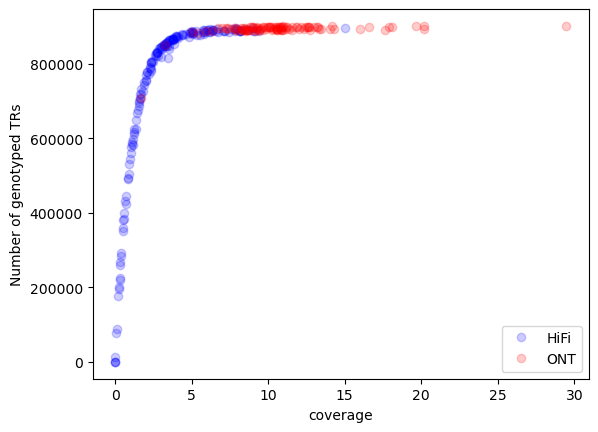

In [23]:
file_ntrs = '/expanse/projects/sebat1/miladm/UCSD/LONG_READ_COHORT/TRs_LongTR/FAM/variant_prior/NTR_COV/gt_counts.tsv'
df_ntrs = pd.read_table(file_ntrs, sep='\t', names=['sample', 'Num_TRs'])
display(df_ntrs)

df_merge = df_ntrs.merge(df_cov, how='left', left_on='sample', right_on='SAMPLE')
display(df_merge)

df_merge.Num_TRs = pd.to_numeric(df_merge.Num_TRs)
df_merge['cov'] = pd.to_numeric(df_merge['MEAN_COVERAGE'])

plt.figure()
plat = 'PB'
plt.plot(df_merge.loc[df_merge.COHORT==plat]['cov'], df_merge.loc[df_merge.COHORT==plat]['Num_TRs'], 'ob', label='HiFi', alpha=.2)
plat = 'ONT'
plt.plot(df_merge.loc[df_merge.COHORT==plat]['cov'], df_merge.loc[df_merge.COHORT==plat]['Num_TRs'], 'or', label='ONT', alpha=.2)
plt.xlabel('coverage')
plt.ylabel('Number of genotyped TRs')
plt.legend()
fig_name = dir_fig+'ntrs_vs_cov.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight')
plt.show()
plt.close()

cds_sum: 16424
utr_sum: 17614
intron_sum: 388757
intgenic_sum: 495762
plots_trs/TR_genomic_regions.png


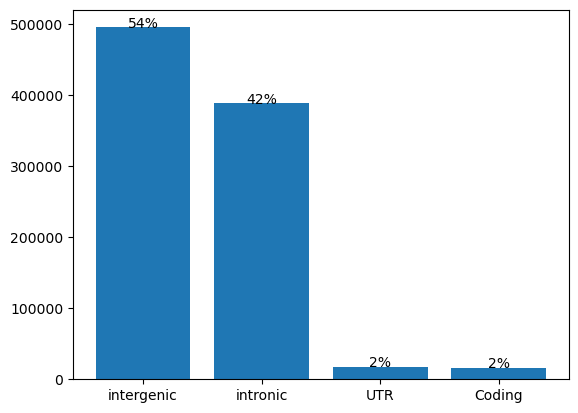

In [11]:
gc_counts = df.GENCODE.value_counts()
#print(gc_counts)
cds_sum = gc_counts[['CDS', 'start_codon', 'stop_codon']].sum()
utr_sum = gc_counts[['five_prime_UTR', 'three_prime_UTR', 'TSS']].sum()
intron_sum = gc_counts[['gene']].sum()
intgenic_sum = gc_counts[['CTCF-only' ,'dELS' ,'DNase-H3K4me3' ,'exon' ,'pELS' ,'PLS', '.']].sum()
print(f'cds_sum: {cds_sum}')
print(f'utr_sum: {utr_sum}')
print(f'intron_sum: {intron_sum}')
print(f'intgenic_sum: {intgenic_sum}')

x = ['intergenic' ,'intronic', 'UTR', 'Coding']
y = [intgenic_sum, intron_sum, utr_sum, cds_sum]
plt.figure()
plt.bar(x, height=y)
for i in range(len(x)):
    plt.text(x=i, y=y[i], s=f'{y[i]/np.sum(y)*100:.0f}%', ha='center')
fig_name = dir_fig+'TR_genomic_regions.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight')
plt.show()
plt.close()


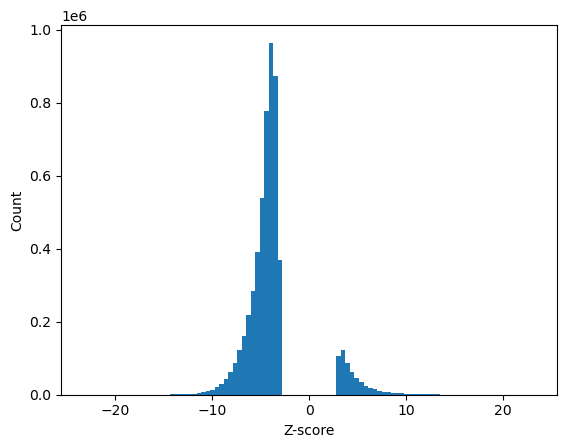

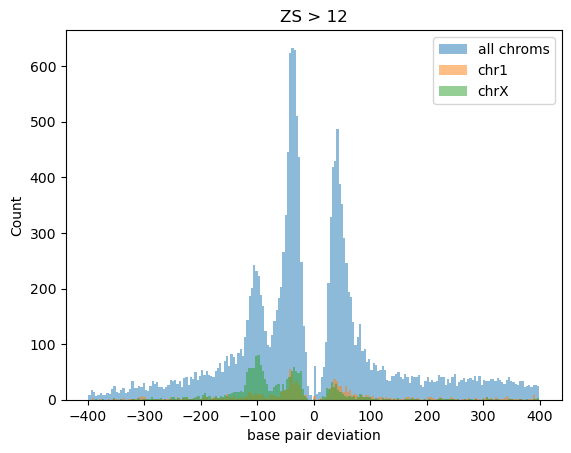

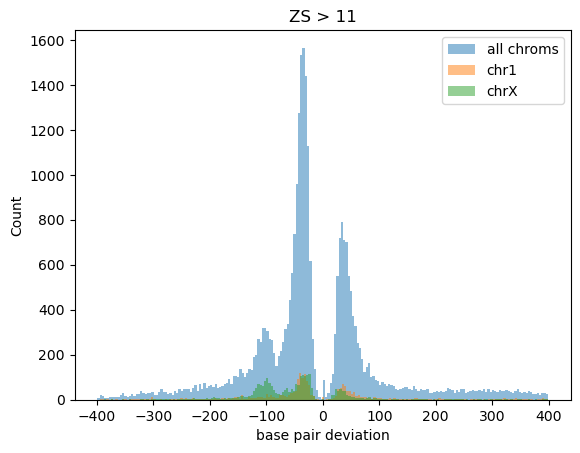

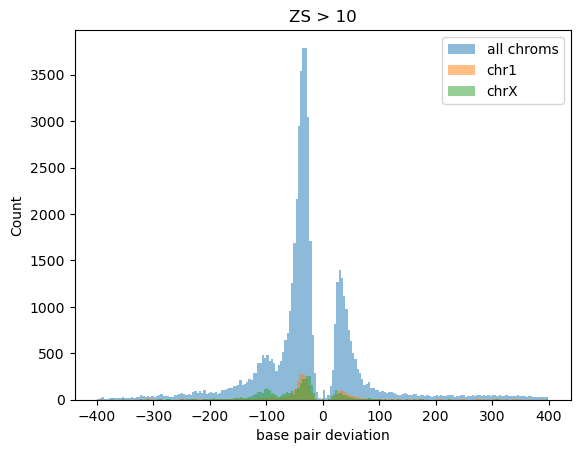

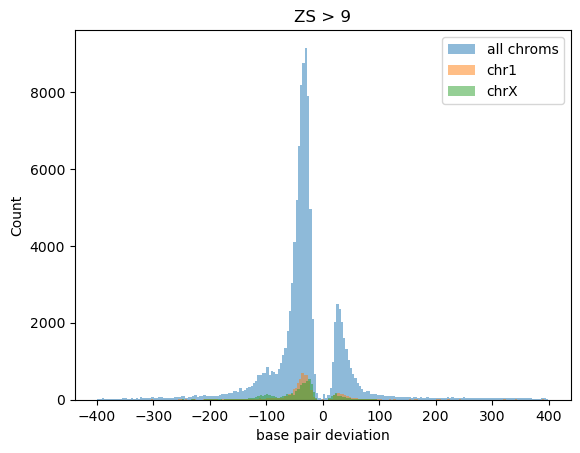

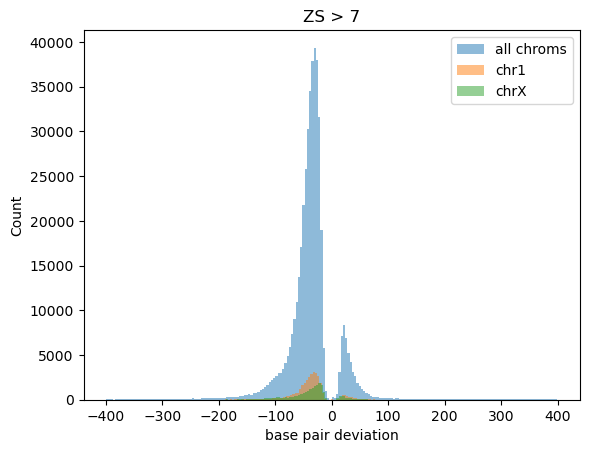

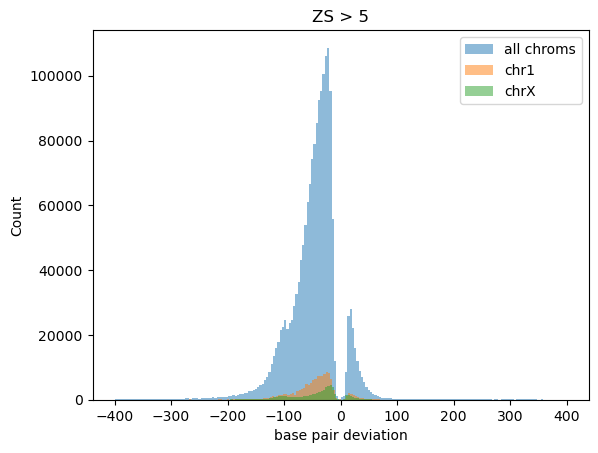

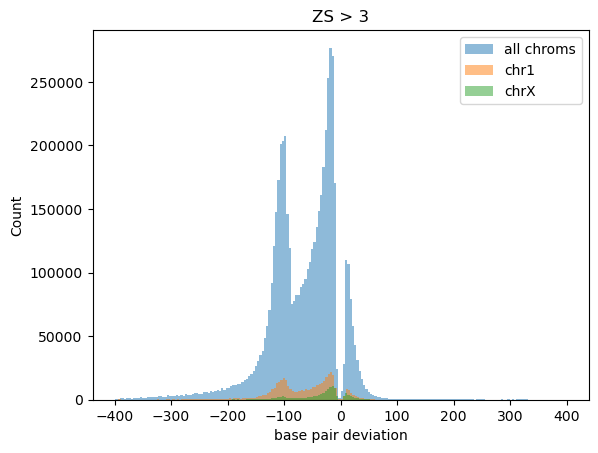

In [11]:
# this was to examine TRs which are not close to SINE or LINEs to see if they have the peaks
file_name = 'out.bed'
df_zs = pd.read_table(file_name, sep='\t', names=['chrom', 'pos', 'end', 'ID', 'Z-score', 'GB'])
#display(df_zs)
plt.figure()
bins = 100
plt.hist(df_zs['Z-score'], bins=bins)
plt.xlabel('Z-score')
plt.ylabel('Count')
#fig_name = dir_fig+'hist_zscore.png'
#print(fig_name)
#plt.savefig(fig_name, bbox_inches='tight')
plt.show()
plt.close()

for z_thr in [12, 11, 10, 9, 7, 5, 3]:
    plt.figure()
    bp_thr = 400
    bins = 200
    plt.hist(df_zs.loc[(df_zs['Z-score'].abs()>z_thr) & (df_zs.GB.abs()<bp_thr)]['GB'], bins=bins, label='all chroms', alpha=.5)
    plt.hist(df_zs.loc[(df_zs.chrom=='chr1') & (df_zs['Z-score'].abs()>z_thr) & (df_zs.GB.abs()<bp_thr)]['GB'], bins=bins, label='chr1', alpha=.5)
    plt.hist(df_zs.loc[(df_zs.chrom=='chrX') & (df_zs['Z-score'].abs()>z_thr) & (df_zs.GB.abs()<bp_thr)]['GB'], bins=bins, label='chrX', alpha=.5)
    plt.xlabel('base pair deviation')
    plt.ylabel('Count')
    plt.title(f'ZS > {z_thr}')
    plt.legend()
    #fig_name = dir_fig+f'hist_bp_dev_lzs{z_thr}.png'
    #print(fig_name)
    #plt.savefig(fig_name, bbox_inches='tight')
    plt.show()
    plt.close()

In [10]:
z_thr = 12
dbp1 = -120
dbp2 = -80
for z_thr in [3, 5, 7, 9, 10, 11, 12]:
    this_df = df_zs.loc[(df_zs['Z-score'].abs()>z_thr) & (df_zs.GB>dbp1) & (df_zs.GB<dbp2)].copy()
    this_df['chrom'] = this_df['ID'].map(lambda x: x.split('_')[0])
    this_df['pos'] = this_df['ID'].map(lambda x: x.split('_')[1]).astype(int)
    this_df['end'] = this_df['ID'].map(lambda x: x.split('_')[2]).astype(int)
    this_df['chrom_size'] = this_df['chrom'].map(df_chr_size['size'])
    this_df['pos_pct'] = this_df.pos / this_df.chrom_size
    display(this_df.shape)
    #display(this_df)
    order_cols = ['chrom', 'pos', 'end', 'chrom_size', 'pos_pct', 'ID', 'Z-score', 'GB']
    this_df[order_cols].to_csv(f'temp_m100Peak_Z{z_thr}.tsv', sep='\t', index=None)

(3286198, 8)

(668025, 8)

(78637, 8)

(19504, 8)

(11425, 8)

(7002, 8)

(4770, 8)

In [18]:
order_cols = ['CHROM', 'POS', 'END', 'ID']
df[order_cols].to_csv(f'temp_all_TRs.tsv', sep='\t', index=None)

(3286198, 9)

,ID,Z-score,GB,SAMPLE,chrom,pos,end,chrom_size,pos_pct
90,chr1_44805_44906,-8.20,-89,REACH000542,chr1,44805,44906,248956422,0.000180
91,chr1_44805_44906,-8.20,-89,REACH000543,chr1,44805,44906,248956422,0.000180
92,chr1_44805_44906,-8.20,-89,REACH000547,chr1,44805,44906,248956422,0.000180
93,chr1_44805_44906,-8.20,-89,REACH000564,chr1,44805,44906,248956422,0.000180
94,chr1_44805_44906,-8.20,-89,REACH000566,chr1,44805,44906,248956422,0.000180
...,...,...,...,...,...,...,...,...,...
12722095,chrY_26412541_26412624,-10.56,-92,REACH000425,chrY,26412541,26412624,57227415,0.461537
12722241,chrY_26556341_26556452,-7.70,-119,REACH000483,chrY,26556341,26556452,57227415,0.464049
12722242,chrY_26556341_26556452,-7.70,-119,REACH000564,chrY,26556341,26556452,57227415,0.464049
12722261,chrY_26573644_26573730,-10.88,-96,REACH000421,chrY,26573644,26573730,57227415,0.464352


plots_trs/peak_100_hist_chroms_ZS3.png


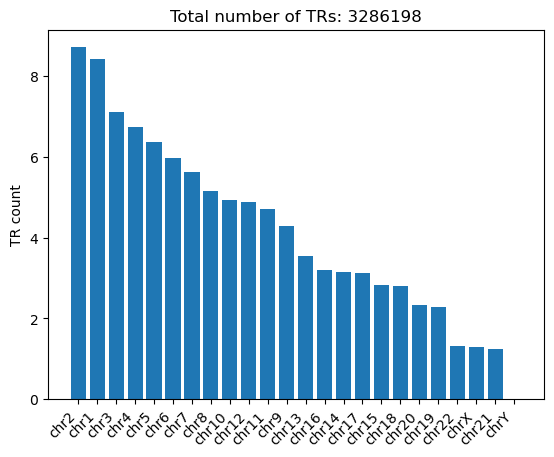

plots_trs/peak_100_hist_chrom_loc_ZS3.png


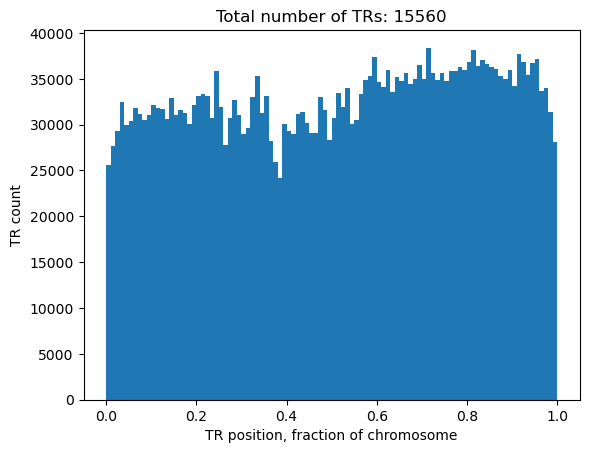

plots_trs/samples_lzs3


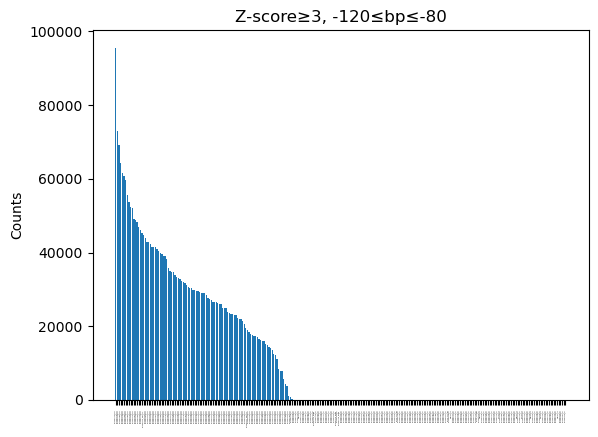

In [35]:
z_thr = 3
dbp1 = -120
dbp2 = -80
this_df = df_zs.loc[(df_zs['Z-score'].abs()>z_thr) & (df_zs.GB>dbp1) & (df_zs.GB<dbp2)].copy()
this_df['chrom'] = this_df['ID'].map(lambda x: x.split('_')[0])
this_df['pos'] = this_df['ID'].map(lambda x: x.split('_')[1]).astype(int)
this_df['end'] = this_df['ID'].map(lambda x: x.split('_')[2]).astype(int)
this_df['chrom_size'] = this_df['chrom'].map(df_chr_size['size'])
this_df['pos_pct'] = this_df.pos / this_df.chrom_size
#this_df.to_csv(dir_fig+'peak_100.txt', sep='\t', index=None, header=True)
display(this_df.shape)
display(this_df)
order_cols = ['chrom', 'pos', 'end', 'chrom_size', 'pos_pct', 'ID', 'Z-score']
this_df[order_cols].to_csv(f'temp_m100Peak_Z{z_thr}.tsv', sep='\t', index=None)

N_tot = this_df.shape[0]
counts_chrom = this_df.chrom.value_counts()
counts_pct = counts_chrom / N_tot * 100

plt.figure()
plt.bar(x=counts_pct.index.tolist(), height=counts_pct)
plt.xticks(rotation=45, ha='right')
plt.ylabel('TR count')
plt.title(f'Total number of TRs: {this_df.shape[0]}')
fig_name = dir_fig+f'peak_100_hist_chroms_ZS{z_thr}.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight')
plt.show()
plt.close()

### is it near telomeres...
plt.figure()
plt.hist(this_df.pos_pct, bins=100)
plt.xlabel('TR position, fraction of chromosome')
plt.ylabel('TR count')
plt.title(f'Total number of TRs: {df_flt.shape[0]}')
fig_name = dir_fig+f'peak_100_hist_chrom_loc_ZS{z_thr}.png'
print(fig_name)
plt.savefig(fig_name, bbox_inches='tight')
plt.show()
plt.close()

# which samples have the deviations
count_nums = this_df.SAMPLE.value_counts().tolist()
count_samples = [f'{x}|{get_plat(x)}' for x in this_df.SAMPLE.value_counts().index.get_level_values(0).tolist()]
fig, ax = plt.subplots()
ax.bar(count_samples, count_nums)
ax.set_xticks(count_samples, count_samples, rotation=90, fontsize=1)
ax.set_aspect('auto')
plt.ylabel('Counts')
plt.title(f'Z-score≥{z_thr}, {dbp1}≤bp≤{dbp2}')
fig_name = dir_fig+f'samples_lzs{z_thr}'
print(fig_name)
plt.savefig(fig_name+'.png', bbox_inches='tight')
plt.savefig(fig_name+'.pdf', bbox_inches='tight')
plt.show()
plt.close()

,ID,MEAN,STD
0,chr1_705499_705585,-0.59,5.92
1,chr1_2865247_2865341,-0.94,6.27
2,chr1_3010390_3010752,-0.18,8.94
3,chr1_3143434_3143518,-0.40,4.92
4,chr1_5458117_5458607,-0.53,7.17
...,...,...,...
3645,chrX_155724603_155724698,-0.27,5.52
3646,chrX_155907767_155908201,-0.67,8.58
3647,chrX_155950733_155951140,-0.65,7.45
3648,chrX_156028580_156028780,-0.69,5.12


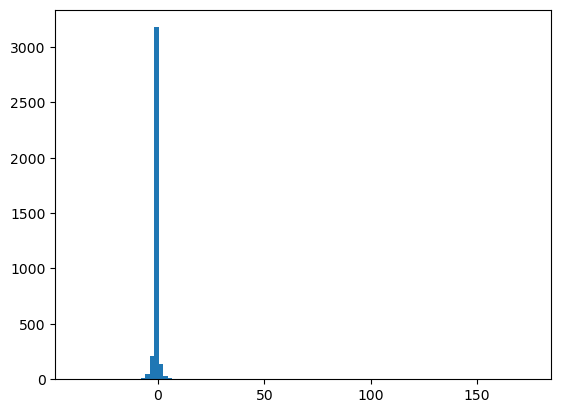

In [15]:
file_mean_std = 'mean_std_m100Peak.tsv'
df_mean_std = pd.read_table(file_mean_std, sep='\t', names=['ID', 'MEAN', 'STD'])
display(df_mean_std)

plt.figure()
plt.hist(df_mean_std.loc[df_mean_std.MEAN<200].MEAN, bins=100)
#plt.xlabel('TR position, fraction of chromosome')
#plt.ylabel('TR count')
#plt.title(f'Total number of TRs: {df_flt.shape[0]}')
#fig_name = dir_fig+f'peak_100_hist_chrom_loc_ZS{z_thr}.png'
#print(fig_name)
#plt.savefig(fig_name, bbox_inches='tight')
plt.show()
plt.close()